In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import feature_selection, model_selection
from sklearn.preprocessing import StandardScaler

## 1-A
Import the data.

In [26]:
df = pd.read_csv('communities/communities.csv', na_values=['?'])
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


We can see that the data is already normalized.

In [27]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

OtherPerCap    1
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.describe(include='all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
unique,NaN,1827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683894,NaN,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,16.401661,NaN,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.233043
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


The state column lists the states as a numeric variable. This will not be useful in a regression model since the states are ranked arbitrarily. Community name will also be omitted since it is not numeric. Looking at the descriptive statistics, the shape of the distribution will help with the predictive power for those variables. For example, population has a severe right skew, meaning high population areas will have more variance in crime rate becuase there are a limited amount of high population cities.

Separate target variable.

In [30]:
crimerate = df['ViolentCrimesPerPop']
crimerate.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [31]:
communities = df.drop(columns=['state','communityname','ViolentCrimesPerPop'])
communities.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


Create 80/20 train/test split.

In [32]:
comm_train, comm_test, target_train, target_test = train_test_split(communities, crimerate, test_size=0.2, random_state=4378)
print(comm_test.shape)
comm_test.head()

(399, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
457,0.03,0.56,0.45,0.49,0.05,0.65,0.43,0.57,0.38,0.33,...,0.02,0.01,0.59,0.29,0.23,0.56,0.40,0.03,0.19,0.14
898,0.01,0.40,0.28,0.76,0.02,0.06,0.40,0.44,0.29,0.60,...,0.00,0.00,0.05,0.84,0.42,0.66,0.85,0.05,0.07,0.02
1148,0.00,0.57,0.02,0.95,0.14,0.02,0.34,0.30,0.20,0.56,...,0.00,0.00,0.21,0.70,0.96,0.92,0.88,0.05,0.06,0.09
1536,0.30,0.42,0.87,0.30,0.03,0.02,0.45,0.47,0.30,0.43,...,0.07,0.03,0.03,0.77,0.62,0.81,0.78,0.29,0.17,0.19
1749,0.05,0.32,0.46,0.62,0.04,0.04,0.35,0.39,0.26,0.70,...,0.02,0.00,0.08,0.42,0.45,0.55,0.53,0.08,0.12,0.01


## 1-B
Build multiple linear regression model.

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(comm_train, target_train)

LinearRegression()

In [35]:
train_pred = reg.predict(comm_train)

In [36]:
train_rmse = root_mean_squared_error(target_train, train_pred)
print('Train RMSE:', train_rmse)

Train RMSE: 0.1294577908566264


In [37]:
test_pred = reg.predict(comm_test)

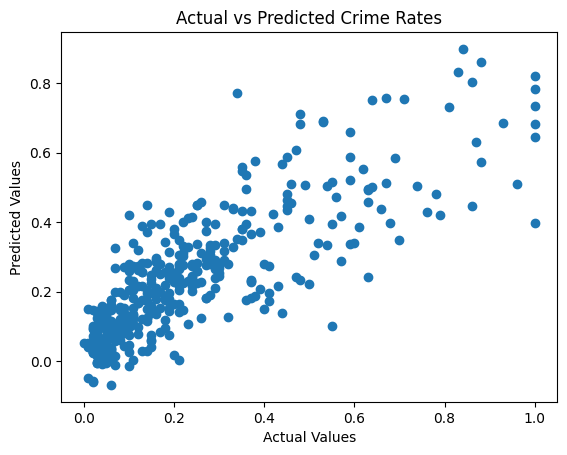

In [38]:
plt.scatter(target_test,test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Crime Rates')
plt.show()

The correlation between actual and predicted values shows a linear relationship between the two. There are some issues with negative predicted values, since it is impossible for actual crime rate to be below 0. Also, as the actual values increase, the model tends to under predict the actual values.

Create 10-Fold Cross Validation for model on training set and get the RMSE.

In [39]:
cv_reg = cross_val_score(reg,comm_train,target_train,scoring='neg_root_mean_squared_error',cv=10)
cv_rmse = -cv_reg.mean()

In [40]:
print('CV RMSE:',cv_rmse)
print('Train RMSE:', train_rmse)

CV RMSE: 0.13853575010697622
Train RMSE: 0.1294577908566264


With a lower RMSE, the original training model performed better than the 10-fold cross validated model.

## 1-C

Feature_pct takes in data for X and y and the model being used. It returns the optimal percentage of X features to use for the model.

In [41]:
def feature_pct(x,y,model):
    p = []
    errors = []
    model.fit(x,y)
    cols = x.columns.tolist()
    for i in range(15,86,5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(x, y)
        # print(fs.get_feature_names_out())
        # print(fs.get_params())
        # print(fs.feature_names_in_)
        scores = cross_val_score(model,X_train_fs,y,cv=5,scoring='neg_mean_absolute_error')
        score = abs(scores).mean()
        p.append(i)
        errors.append(score)
        # print(i,score)

    diffs = np.diff(errors)
    increasing = diffs > 0
    if np.any(increasing):
        index = np.argmax(increasing)
        optimal_p = p[index]
    
    return optimal_p

In [42]:
linreg = LinearRegression()
pct = feature_pct(comm_train,target_train,linreg)
pct

35

The optimal feature percentage is 35%.

In [43]:
p = []
errors = []
for i in range(5,101,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    comm_train_fs = fs.fit_transform(comm_train, target_train)
    scores = cross_val_score(reg,comm_train_fs,target_train,cv=5,scoring='neg_mean_absolute_error')
    score = abs(scores).mean()
    p.append(i)
    errors.append(score)
    if i == pct:
        fs_features = fs.get_feature_names_out()
        fs_scores = fs.scores_

In [44]:
print(fs_features)
print(len(fs_features))
# print(fs_scores)

['population' 'racepctblack' 'racePctWhite' 'numbUrban' 'medIncome'
 'pctWInvInc' 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov'
 'PctLess9thGrade' 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce'
 'FemalePctDiv' 'TotalPctDiv' 'PctFam2Par' 'PctKids2Par'
 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg' 'PctIlleg' 'PctLargHouseFam'
 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'MedNumBR'
 'HousVacant' 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone'
 'PctWOFullPlumb' 'NumInShelters' 'NumStreet']
34


Find the corresponding feature score to the features selected.

In [45]:
features = {}
cols = comm_train.columns.tolist()
for col in cols:
    if col in fs_features:
        features[col] = fs_scores[cols.index(col)]

In [46]:
print(len(features))
print(features)

34
{'population': 272.98983241994665, 'racepctblack': 1063.1468152133507, 'racePctWhite': 1398.7213707887865, 'numbUrban': 266.15231888607656, 'medIncome': 347.2717584289051, 'pctWInvInc': 794.4277559102329, 'pctWPubAsst': 757.8653477932338, 'medFamInc': 379.81988766767415, 'NumUnderPov': 428.6214817482518, 'PctPopUnderPov': 612.7720135050994, 'PctLess9thGrade': 326.93429611851855, 'PctNotHSGrad': 490.08229697000917, 'PctUnemployed': 548.5036595857663, 'MalePctDivorce': 626.341301868543, 'FemalePctDiv': 732.8932567169636, 'TotalPctDiv': 719.2985635627796, 'PctFam2Par': 1570.2588212275778, 'PctKids2Par': 1884.7127052380386, 'PctYoungKids2Par': 1247.4597143085127, 'PctTeen2Par': 1247.4971108600412, 'NumIlleg': 477.0225236649691, 'PctIlleg': 1873.0552300007305, 'PctLargHouseFam': 270.8624912450881, 'PctPersOwnOccup': 630.5560851846751, 'PctPersDenseHous': 406.93979455812394, 'PctHousLess3BR': 489.1021436518567, 'MedNumBR': 244.1617300489926, 'HousVacant': 371.15579764908676, 'PctHousOwnOc

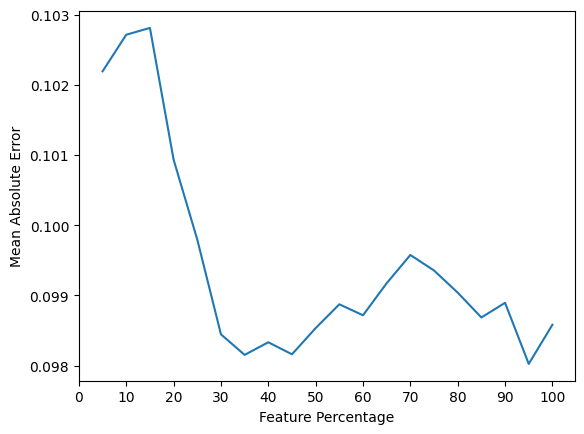

In [47]:
plt.plot(p,errors)
plt.xticks(range(0,101,10))
plt.ylabel('Mean Absolute Error')
plt.xlabel('Feature Percentage')
plt.show()

With 35% percent of features used, the MAE approaches near its lowest value, before increasing again at 40%. This shows that 35% is the optimal percentage to achieve a low MAE.

## 1-D
Create model selection function for ridge regression and lasso regression to determine the best alpha value for the training data.

In [158]:
def ridge_alpha(data, target, vals):
    results = []
    rmse_train = []
    for a in vals:
        ridge = Ridge(alpha = a, random_state = 78493)
        ridge.fit(data,target)
        y_train = ridge.predict(data)
        rmse = np.sqrt(mean_squared_error(target, y_train))
        rmse_train.append(rmse)
        scores = model_selection.cross_val_score(ridge, data, target, cv=5, scoring='neg_root_mean_squared_error')
        results = np.append(results, abs(scores).mean())
        print(a, abs(scores).mean())
    
    optimal_a = np.where(results == results.min())[0][0]

    plt.plot(vals,results,label='CV')
    plt.plot(vals,rmse_train,label='Train')
    plt.title('Ridge Regression Model Selection')
    plt.xlabel('alpha')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    print('Optimal alpha:', vals[optimal_a])
    return vals[optimal_a]
    

0.001 0.13952519870353194
0.112 0.13915483294775605
0.223 0.13905990138503588
0.334 0.13900575656432174
0.445 0.13896877350348122
0.556 0.13894149851921123
0.667 0.13892053679488506
0.778 0.13890402248727002
0.889 0.13889080856951597
1.0 0.13888013578371114


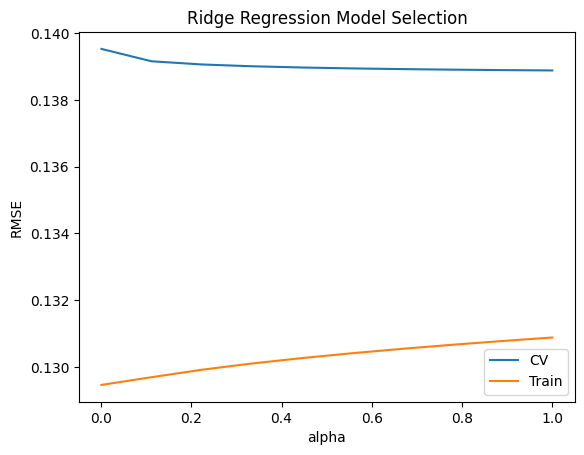

Optimal alpha: 1.0


In [159]:
ridge_a = ridge_alpha(comm_train,target_train,np.linspace(0.001,1,10))

The optimal alpha for ridge regression is 1.0

In [160]:
def lasso_alpha(data, target, vals):
    results = []
    rmse_train = []
    for a in vals:
        lasso = Lasso(alpha = a, random_state = 78493)
        lasso.fit(data,target)
        y_train = lasso.predict(data)
        rmse = np.sqrt(mean_squared_error(target, y_train))
        rmse_train.append(rmse)
        scores = model_selection.cross_val_score(lasso, data, target, cv=5, scoring='neg_root_mean_squared_error')
        results = np.append(results, abs(scores).mean())
        print(a, abs(scores).mean())
    
    optimal_a = np.where(results == results.min())[0][0]

    plt.plot(vals,results,label='CV')
    plt.plot(vals,rmse_train,label='Train')
    plt.title('Lasso Regression Model Selection')
    plt.xlabel('alpha')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    print('Optimal alpha:', vals[optimal_a])
    return vals[optimal_a]

0.0001 0.13935457121030193
0.0112 0.15815995044310235
0.0223 0.18453115481520777
0.033400000000000006 0.21565647567335078
0.044500000000000005 0.2349572438979864
0.055600000000000004 0.2349572438979864
0.06670000000000001 0.2349572438979864
0.07780000000000001 0.2349572438979864
0.0889 0.2349572438979864
0.1 0.2349572438979864


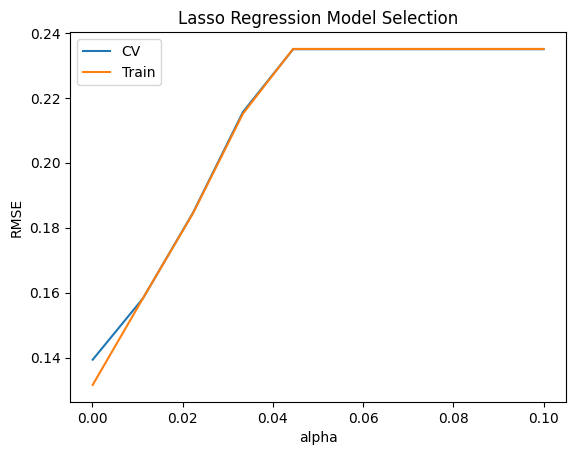

Optimal alpha: 0.0001


In [161]:
lasso_a = lasso_alpha(comm_train,target_train,np.linspace(0.0001,0.1,10))

Use optimal alpha values for ridge and lasso models to test on testing data.

In [118]:
ridge = Ridge(alpha = ridge_a)
ridge.fit(comm_train,target_train)
pred_y = ridge.predict(comm_test)
ridge_rmse = np.sqrt(root_mean_squared_error(target_test, pred_y))
print('Lasso Alpha:',lasso_a)
print(f"RMSE: {ridge_rmse:.4f}")

Lasso Alpha: 0.0001
RMSE: 0.3580


In [119]:
lasso = Lasso(alpha = lasso_a)
lasso.fit(comm_train,target_train)
pred_y = lasso.predict(comm_test)
lasso_rmse = np.sqrt(root_mean_squared_error(target_test, pred_y))
print('Ridge Alpha:',ridge_a)
print(f"RMSE: {lasso_rmse:.4f}")

Ridge Alpha: 1.0
RMSE: 0.3585


With ridge regression, as the alpha increased, the RMSE decreases due to overfitting the training data. For lasso regressio, the opposite is true, with an increased RMSE along with an increased alpha. For each model, its important to know how the alpha value will make the model more or less biased which parameters need to be tuned to improve the error when testing.

## 1-E

Create a Stochastic Gradient Descent regression model. <br>
Normalize the data using standard deviation and create an 80-20 train-test split.

In [135]:
scaler = StandardScaler()
communities_z = pd.DataFrame(scaler.fit_transform(communities), columns = communities.columns, index=communities.index)
communities_z.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,1.043225,-0.815101,-0.629838,0.599049,-0.161612,0.111457,-0.542605,-0.166590,-0.278064,-0.575413,...,0.102792,-0.226992,-0.413932,-0.924180,-0.192855,-0.580248,-0.057871,0.500254,0.133397,0.167039
1,-0.453982,-1.853548,-0.234279,-0.057371,1.418449,-0.318702,-1.058084,0.669367,0.082301,-0.854507,...,-0.287054,-0.226992,-0.024470,-0.532528,-1.075301,-0.131302,-0.663309,-0.413341,-0.555999,1.258546
2,-0.453982,-0.265335,1.229289,-0.795844,0.077791,-0.447749,-0.220430,-0.166590,-0.338125,-0.575413,...,-0.287054,-0.226992,-0.327385,-0.581484,0.027756,0.217878,-0.461496,-0.504700,-0.112816,-0.618846
3,-0.138780,1.872643,3.246640,-2.765105,-0.161612,-0.189654,0.552789,0.042399,0.022240,-1.189420,...,-0.287054,-0.226992,-0.111017,-1.511658,1.075660,0.068229,-0.007417,-0.413341,0.773551,0.516322
4,-0.375181,0.528771,-0.629838,0.804181,-0.305254,-0.404734,-0.284865,-0.793558,-0.638429,-0.352138,...,-0.287054,-0.226992,-0.457205,0.544515,0.579285,-0.081419,-0.612856,-0.230622,-0.703727,-0.618846


In [137]:
sgd_train, sgd_test, sgd_target_train, sgd_target_test = train_test_split(communities_z, crimerate, test_size=0.2, random_state=4378)
print(sgd_train.shape)
sgd_train.head()

(1594, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
451,-0.138780,-0.754016,-0.708950,0.804181,-0.017970,-0.533781,-0.671475,-0.793558,-0.698489,1.154971,...,-0.287054,-0.226992,-0.587026,1.376776,0.855049,0.966121,0.850287,-0.230622,-0.211301,-0.487865
453,-0.059980,-0.692931,0.003057,0.393918,-0.544657,-0.576797,0.295049,0.042399,0.262484,0.652601,...,-0.189593,-0.226992,-0.846667,0.348689,-0.248008,0.467292,-0.158777,-0.139262,-0.260544,-0.400544
807,-0.138780,-0.631846,0.082168,0.311866,-0.592538,-0.576797,-0.413735,-0.166590,-0.157942,0.373507,...,-0.092131,-0.226992,-0.760120,0.936167,-0.248008,-0.280951,0.598021,0.134816,-0.605242,-0.400544
1557,-0.375181,0.284430,-0.155167,-0.795844,4.051885,0.154473,-0.542605,-0.793558,-0.638429,-0.575413,...,-0.287054,-0.226992,0.927547,-0.238789,0.138062,0.118112,0.900741,-0.504700,0.231883,0.647303
393,-0.217581,0.162260,0.319504,-0.590712,-0.496777,0.756695,0.359484,0.669367,0.442666,-0.687050,...,-0.189593,-0.226992,0.364991,0.348689,-0.744384,-0.131302,0.598021,-0.047903,-0.605242,-0.575185


In [176]:
sgd = SGDRegressor(random_state=78904)
param_grid = {
    'alpha': np.linspace(0.0001,10,10),
    'penalty': ['l1', 'l2']
}

In [177]:
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

In [178]:
grid_search.fit(sgd_train, sgd_target_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=78904), n_jobs=-1,
             param_grid={'alpha': array([1.0000e-04, 1.1112e+00, 2.2223e+00, 3.3334e+00, 4.4445e+00,
       5.5556e+00, 6.6667e+00, 7.7778e+00, 8.8889e+00, 1.0000e+01]),
                         'penalty': ['l1', 'l2']},
             scoring='neg_mean_squared_error')

In [179]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(sgd_test)
rmse = np.sqrt(mean_squared_error(sgd_target_test, y_pred))

print("Best parameters found:", grid_search.best_params_)
print(f"RMSE on test set: {rmse:.4f}")

Best parameters found: {'alpha': 0.0001, 'penalty': 'l1'}
RMSE on test set: 0.1303


Optimal SGDRegressor model uses alpha = 0.0001 and 'l1' penalty parameter.

In [175]:
best_model

SGDRegressor(penalty='l1', random_state=78904)

Create another SGD Regressor using elasticnet and perform model selection to find the optimal L1 ratio.

SGD Elastic Net
L1 Ratio	 RMSE_train	 RMSE_test	 Gap

0.100		 0.1328		 0.1298		 0.0030
0.147		 0.1328		 0.1298		 0.0030
0.195		 0.1328		 0.1298		 0.0030
0.242		 0.1328		 0.1298		 0.0030
0.289		 0.1328		 0.1298		 0.0030
0.337		 0.1328		 0.1298		 0.0029
0.384		 0.1328		 0.1298		 0.0029
0.432		 0.1328		 0.1298		 0.0029
0.479		 0.1328		 0.1298		 0.0029
0.526		 0.1328		 0.1298		 0.0029
0.574		 0.1328		 0.1298		 0.0029
0.621		 0.1327		 0.1298		 0.0029
0.668		 0.1327		 0.1298		 0.0029
0.716		 0.1327		 0.1298		 0.0029
0.763		 0.1327		 0.1298		 0.0029
0.811		 0.1327		 0.1298		 0.0029
0.858		 0.1327		 0.1298		 0.0029
0.905		 0.1327		 0.1298		 0.0029
0.953		 0.1327		 0.1298		 0.0029
1.000		 0.1327		 0.1298		 0.0029


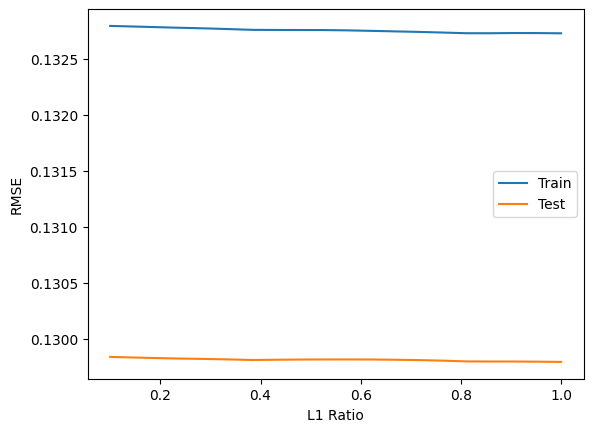

In [191]:
print('SGD Elastic Net')
print('L1 Ratio\t RMSE_train\t RMSE_test\t Gap\n')
train_rmse = []
test_rmse = []
for r in np.linspace(0.1,1,20):
    model = SGDRegressor(penalty='elasticnet',l1_ratio=r,random_state=4367)
    model.fit(sgd_train, sgd_target_train)
    train_pred = model.predict(sgd_train)
    train_error = np.sqrt(mean_squared_error(train_pred,sgd_target_train))
    train_rmse.append(train_error)
    test_pred = model.predict(sgd_test)
    test_error = np.sqrt(mean_squared_error(test_pred,sgd_target_test))
    test_rmse.append(test_error)
    gap = train_error - test_error
    print('{:.3f}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(r,train_error,test_error,gap))


plt.plot(np.linspace(0.1,1,20), train_rmse, label='Train')
plt.plot(np.linspace(0.1,1,20), test_rmse, label='Test')
plt.xlabel('L1 Ratio')
plt.ylabel('RMSE')
plt.legend()
plt.show()


The RMSE stays consistent for all L1 Ratio values. Without normalizing the data, ridge regression clearly performs better than lasso, but with SGD and normalizing the data, they perform the same. Since the L1 ratio is a mix between ridge and lasso regularization, there is no difference between the two with this data.